<a href="https://colab.research.google.com/github/englishmuffins10/Homework/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Excercise 6.7: Page 240

a) Get vector equations:

![picture](https://drive.google.com/uc?export=view&id=1d10w7AP_YOD8P9TTLBzZTo8QqpLItj3y)

![picture](https://drive.google.com/uc?export=view&id=1je6dua1-7vUC9hVoNNny0JVZM9AcTKL4)




b) Program to find values of V for N = 6

In [8]:
import numpy as np

# Define Constants
N = 6
Vplus = 5

# Define Arrays
A = np.zeros(N**2)
A = A.reshape(N,N)
W = np.zeros(N)
W = W.reshape(N,1)
W[0,0] = Vplus
W[1,0] = Vplus

# Fill array A with values
for ix in range(N):
  for iy in range(N):
    if((ix == 0) and (iy == 0)):
      A[ix,iy] = 3
    elif((ix == N-1) and (iy == N-1)):
      A[ix,iy] = 3
    elif(ix == iy):
      A[ix,iy] = 4
    elif( iy-2 <= ix <= iy+2):
      A[ix,iy] = -1

print("A=\n",A)
print("W=\n",W)
V=np.linalg.solve(A,W)
print("Solving for V in AV=W, V=\n",V)

A=
 [[ 3. -1. -1.  0.  0.  0.]
 [-1.  4. -1. -1.  0.  0.]
 [-1. -1.  4. -1. -1.  0.]
 [ 0. -1. -1.  4. -1. -1.]
 [ 0.  0. -1. -1.  4. -1.]
 [ 0.  0.  0. -1. -1.  3.]]
W=
 [[5.]
 [5.]
 [0.]
 [0.]
 [0.]
 [0.]]
Solving for V in AV=W, V=
 [[3.7254902 ]
 [3.43137255]
 [2.74509804]
 [2.25490196]
 [1.56862745]
 [1.2745098 ]]


c) Program to find values of V for N = 10000

In [45]:
import numpy as np

# Define Constants
N = 10000
Vplus = 5

# Define Arrays
Aa = np.zeros(N**2)
Aa = Aa.reshape(N,N)
Wa = np.zeros(N)
Wa = Wa.reshape(N,1)
Wa[0,0] = Vplus
Wa[1,0] = Vplus

# Function that takes ix and iy, returns the array value for that position
def getVal(ix,iy):
  if((ix == 0) and (iy == 0)):
    return 3
  elif((ix == N-1) and (iy == N-1)):
    return 3
  elif(ix == iy):
    return 4
  elif( iy-2 <= ix <= iy+2):
    return -1

# Fill array A with values, uses less calculations than the code in part b
for iy in range(N):
  if((iy > 2) and (iy < N-2)):
    for ix in range(iy-2,iy+3,1):
      Aa[ix,iy] = getVal(ix,iy)
  elif(iy <= 2):
    for ix in range(0,iy+3,1):
      Aa[ix,iy] = getVal(ix,iy)
  else:
    for ix in range(iy-2,N,1):
      Aa[ix,iy] = getVal(ix,iy)
  
# Gets the x value for the diagonal array, takes ix and iy
def getX(ix,iy):
  return (ix - iy) + 2

# Converts a NxN bounded array to a 5XN array of the diagonals
def DiagonalArray(Aa):
  Ad = np.zeros(N*5)
  Ad = Ad.reshape(5,N)

  for iy in range(N):
    if((iy > 2) and (iy < N-2)):
      for ix in range(iy-2,iy+3,1):
        val = getX(ix,iy)
        Ad[val,iy] = Aa[ix,iy]
    elif(iy <= 2):
      for ix in range(0,iy+3,1):
        val = getX(ix,iy)
        Ad[val,iy] = Aa[ix,iy]
    else:
      for ix in range(iy-2,N,1):
        val = getX(ix,iy)
        Ad[val,iy] = Aa[ix,iy]

  return Ad


# Function that will get the solution array, from the book
# Takes the arrays Ad and Wa, in the form AV = W
# Where Ad is the diagonally stored, bounded NxN array in the form 5xN
# Takes up and down, referencing the number of values above and below the  diagonal
def banded(Ad,Wa,up,down):

  A = np.copy(Ad)
  W = np.copy(Wa)
  N = len(W)

  # Gaussian elimination
  for m in range(N):

    # Normalization factor
    div = A[up,m]

    # Update the vector first
    W[m] /= div
    for k in range(1,down+1):
      if m+k<N:
        W[m+k] -= A[up+k,m]*W[m]

    # Now normalize and subtract the pivot row
    for i in range(up):
      j = m + up - i
      if j<N:
        A[i,j] /= div
        for k in range(1,down+1):
          A[i+k,j] -= A[up+k,m]*A[i,j]

  # Backsubstitution
  for m in range(N-2,-1,-1):
    for i in range(up):
      j = m + up - 1
      if j<N:
        W[m] -= A[i,j]*W[j]

  return W

# Print Arrays A and W
print("A=\n",Aa)
print("W=\n",Wa)

# Convert A to be diagonally stored
Ad = DiagonalArray(Aa)
#print("Diagonal A=\n",Ad)

# Get the solution using the banded equation
V=banded(Ad,Wa,2,2)
print("Solving for V in AV=W, V=\n",V)

A=
 [[ 3. -1. -1. ...  0.  0.  0.]
 [-1.  4. -1. ...  0.  0.  0.]
 [-1. -1.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4. -1. -1.]
 [ 0.  0.  0. ... -1.  4. -1.]
 [ 0.  0.  0. ... -1. -1.  3.]]
W=
 [[5.]
 [5.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Solving for V in AV=W, V=
 [[3.36459147e+00]
 [5.09377441e+00]
 [4.69976328e+00]
 ...
 [2.49919121e-03]
 [1.80846993e-03]
 [1.11772227e-03]]


2) Excercise 6.13: Page 267

a) Go through equations:

![picture](https://drive.google.com/uc?export=view&id=1TCvWOoalilRSF-W_pEhguWE7WU_CN2AX)



b) Program using the binary search method to solve the equation:

In [55]:
from math import exp
import numpy as np

Accuracy = 1e-6
h = 6.626e-34
c = 2.998e8
Kb = 1.381e-23

def f(x):
  return (5*exp(-x)) + x - 5

accuracy = 1e-6
delta = 1.0
x = 1e10
N=0
while abs(delta) > accuracy:
  delta = f(x)
  x -= delta
  N=N+1
print("Solution for X using binary search:", x)

b = ((h*c)/(Kb*x))

print("Wein Displacement Constant:", b)

Solution for X using binary search: 4.96511423351466
Wein Displacement Constant: 0.0028970776561514713


c) Estimation using previous solution for the sun surface temperature:

Surface Temperature = b/Wavelength = (.002897)/(502e-9) = 5771 K




3) Excercise 6.18: Page 285

a) Program to find efficiency given temperature:

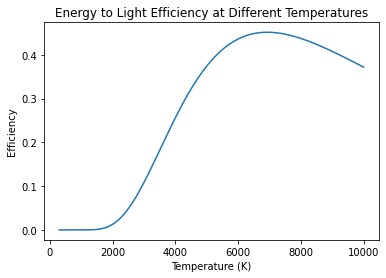

In [61]:
import numpy as np
import math as ma
from matplotlib import pyplot as plt

# Function that gets the integration points and weights
# Takes N as a variable
# Returns x and w as numerical values
# From the textbook online resource
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

# Function that gets the integration points and weights for the integral from a to b
# Takes N, a, and b as variables
# Returns x and w as numerical values
# From the textbook online resource
def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

# Function that gets the integral approximation of a function
# Takes N, a, b, and f as variables
# Returns a numerical value
# Code by Mark Newman
def integrateGauss(N,a,b,f):
    integral = 0.0
    ## get the sample points and optimal weights
    x,w = gaussxwab(N,a,b)

    # Now we use these in the integration
    for k in range(N):
      integral = integral+w[k]*f(x[k])
    return integral

# Function that needs to be integrated to get the efficiency n
# Takes x as a variable
# Returns a numerical value
def f(x):
  return (x**3)/(ma.exp(x)-1)

# Function that gets the efficiency n
# Takes N, a, and b as variables
# Returns a numerical value
def getn(N, a, b):
  return (15/(np.pi**4))*integrateGauss(N,a,b,f)

# Function that takes an empty array nArr, and fills it with its values
# Takes nArr, TArr, and N as variables
# Returns a filled array
def fillnArr(nArr, TArr, N):
  # Constants for a and b
  L1 = 390e-9
  L2 = 750e-9
  h = 6.62607004e-34
  c = 2.99792458e8
  Kb = 1.38064852e-23

  count = 0
  for T in TArr:
    a = (h*c)/(L2*Kb*T)
    b = (h*c)/(L1*Kb*T)
    nArr[count] = getn(N,a,b)
    count +=1
  return nArr

# Starting constants and arrays for plotting data
N = 100
TArr = np.linspace(300,10000, 500)
nArr = np.zeros(len(TArr))

# Fill the nArray
nArr = fillnArr(nArr, TArr, N)

# Plot the result
plt.plot(TArr,nArr)
plt.xlabel("Temperature (K)")
plt.ylabel("Efficiency")
plt.title("Energy to Light Efficiency at Different Temperatures")
plt.show()

b) Program to calculate temperature of maximum efficiency:

In [66]:
import numpy as np
import math as ma

# Function that gets the integration points and weights
# Takes N as a variable
# Returns x and w as numerical values
# From the textbook online resource
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

# Function that gets the integration points and weights for the integral from a to b
# Takes N, a, and b as variables
# Returns x and w as numerical values
# From the textbook online resource
def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

# Function that gets the integral approximation of a function
# Takes N, a, b, and f as variables
# Returns a numerical value
# Code by Mark Newman
def integrateGauss(N,a,b,f):
    integral = 0.0
    ## get the sample points and optimal weights
    x,w = gaussxwab(N,a,b)

    # Now we use these in the integration
    for k in range(N):
      integral = integral+w[k]*f(x[k])
    return integral

# Function that needs to be integrated to get the efficiency n
# Takes x as a variable
# Returns a numerical value
def f(x):
  return (x**3)/(ma.exp(x)-1)

# Function that gets the inverted efficiency n
# Takes T as a variable
# Returns a numerical value
def getn(T):
  # Constants
  L1 = 390e-9
  L2 = 750e-9
  h = 6.62607004e-34
  c = 2.99792458e8
  Kb = 1.38064852e-23
  N = 100

  a = (h*c)/(L2*Kb*T)
  b = (h*c)/(L1*Kb*T)
  return -(15/(np.pi**4))*integrateGauss(N,a,b,f)

# This is the Golden Ratio
gr = (np.sqrt(5) + 1) / 2

# Golden Ratio Search Function for the efficiency n
# Finds the minimum value for f between [x1,x4]
# Returns the predicted minimum value
def GRS(f, x1, x4, Accuracy):
    x2 = x4-(x4 - x1)/gr
    x3 = x1+(x4 - x1)/gr
    while abs(x4 - x1) > Accuracy:
        if f(x2) < f(x3):
            x4 = x3
        else:
            x1 = x2

        x2 = x4-(x4 - x1)/gr
        x3 = x1+(x4 - x1)/gr

    return (x4 + x1)/2

# Starting constants

x1 = 4000
x4 = 8000
Accuracy = 1

Tmax = GRS(getn,x1,x4,Accuracy)

print("Predicted Maximum Temperature:", round(Tmax), "K")

Predicted Maximum Temperature: 6928 K


c) Reasonable temperature?

No, the maximum temperature for the tungsten filament in a light bulb is ~2800 K, so 6928 K is far past the point where the filament will melt and cease to function.





